In [1]:
import pandas as pd
import numpy as np
import re
from helpers import *
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(access_folder(folder_name='generated') + 'tweets_n_hashtags.csv', index_col = 0)

In [3]:
import ast
df.tweet_text = df.tweet_text.apply(ast.literal_eval)

In [4]:
#df.columns = ['Topic', 'tweet_text']
df.head()

,Topic,tweet_text,hashtag
33,News,"[john, carroll, university, get, gift]",news
34,News,"[spring, cook, book, healthy, chocolate, bar]",local
37,News,"[rocky, river, prepare, more, flooding, city, ...",news
39,News,"[forecast, cooler, mid, week, cooler, isolated...",news
40,News,"[brother, farook, decorate, veteran, killer]",TopNews


# Don't run

In [78]:
realHashes = pd.read_csv('hashtagsIndices.csv', index_col=0,  header=None)
realHashes.columns = ['Hashtags']
realHashes.head()

,Hashtags
0,
33,news
34,local
37,news
39,news
40,TopNews


In [81]:
df['hashtag'] = realHashes
df.head(20)

,Topic,tweet_text,hashtag
33,News,"[john, carroll, university, get, gift]",news
34,News,"[spring, cook, book, healthy, chocolate, bar]",local
37,News,"[rocky, river, prepare, more, flooding, city, ...",news
39,News,"[forecast, cooler, mid, week, cooler, isolated...",news
40,News,"[brother, farook, decorate, veteran, killer]",TopNews
42,News,"[arrest, connection, art, festival, theft, arr...",news
44,News,"[director, craven, die, scream, filmmaker, die...",news
45,Sports,"[secretariat, dominate, american, pharoah, bel...",sports
46,News,"[black, box, miss, german, airline, crash]",local
48,Sports,"[dale, earnhardt, get, engage, girlfriend, amy...",sports


#### build hashtag to topic table

In [95]:
hash2topic = {
    'news':'News',
    'local':'News',
    'isis':'News',
    'world':'News',
    'breaking':'News',
    'business':'News',
    'TopNews':'News',
    'Breaking':'News',
    'money':'News',
    'FukushimaAgain':'Fukushima',
    'Fukushima2015':'Fukushima',
    'FUKUSHIMA2015':'Fukushima',
    'fukushima2015':'Fukushima',
    'crime':'Crime',
    'PoliceBrutality':'Crime',
    'NRA':'Patriot',
    'USFA':'Patriot',
    'nra':'Patriot',
    'pjnet':'Patriot',
    'PJNET':'Patriot',
    'ArmyWomenProblems':'Patriot',
    '2A':'Patriot',
    'ISIS':'Anti-Islam',
    'IslamKills':'Anti-Islam',
    'StopIslam':'Anti-Islam',
    'Hillary':'Anti-Trump',
    'ThingsMoreTrustedThanHillary':'Anti-Trump',
    'NeverHillary':'Anti-Trump',
    'ARRESTObama':'Anti-Trump',
    'LockHerUp':'Anti-Trump',
    'ObamaWishlist':'Anti-Trump',
    'Obama':'Anti-Trump',
    'ObamaLameDuck':'Anti-Trump',
    'CrookedHillary':'Anti-Trump',
    'isis':'Foreign Countries',
    'Syria':'Foreign Countries',
    'Turkey':'Foreign Countries',
    'nukraine':'Foreign Countries',
    'Brussels':'Foreign Countries',
    'Russia':'Foreign Countries',
    'Iraq':'Foreign Countries',
    'entertainment':'Entertainment',
    'celebs':'Entertainment',
    'NowPlaying':'Entertainment',
    'Showbiz':'Entertainment',
    'RAP':'Entertainment',
    'life':'Entertainment',
    'Music':'Entertainment',
    'showbiz':'Entertainment',
    'MyEmmyNominationWouldBe':'Entertainment',
    'soundcloud':'Entertainment',
    'IHatePokemonGoBecause':'Entertainment',
    'iTunes':'Entertainment',
    'rap':'Entertainment',
    'BlackLivesMatter':'Black Support',
    'BlackTwitter':'Black Support',
    'blacklivesmatter':'Black Support',
    'BlackHistoryMonth':'Black Support',
    'BlackSkinIsNotACrime':'Black Support',
    'BLM':'Black Support',
    'BlackToLive':'Black Support',
    'blacktwitter':'Black Support',
    'blacktolive':'Black Support',
    'ICelebrateTrumpWith':'Trump Support',
    'MAGA':'Trump Support',
    'WakeUpAmerica':'Trump Support',
    'MakeAmericaGreatAgain':'Trump Support',
    'TrumpTrain':'Trump Support',
    'Trump2016':'Trump Support',
    'maga':'Trump Support',
    'tcot':'Trump Support',
    'TCOT':'Trump Support',
    'GOP':'Trump Support',
    'GOPDebate':'Trump Support',
    'ccot':'Trump Support',
    'AmericaFirst':'Trump Support',
    'TrumpForPresident':'Trump Support',
    'TrumpBecause':'Trump Support',
    'health':'Health',
    'environment':'Health',
    'sports':'Sports',
    'hockey':'Sports',
    'Hockey':'Sports',
    'baseball':'Sports',
    'Sports':'Sports',
    'MyOlympicSportWouldBe':'Sports',
}

In [83]:
hash2topicDF = pd.DataFrame(list(hash2topic.values()), list(hash2topic.keys()))

In [84]:
hash2topicDF.columns = ['category']
hash2topicDF.category.value_counts().sum()

80

In [96]:
df['NewCategories']=df.hashtag.apply(lambda x: hash2topic[x])

In [102]:
df = df.drop('NewCategories', axis=1)
df.head()

,Topic,tweet_text,hashtag
33,News,"[john, carroll, university, get, gift]",news
34,News,"[spring, cook, book, healthy, chocolate, bar]",local
37,News,"[rocky, river, prepare, more, flooding, city, ...",news
39,News,"[forecast, cooler, mid, week, cooler, isolated...",news
40,News,"[brother, farook, decorate, veteran, killer]",TopNews


In [178]:
df.tweet_text.iloc[159080]

['margaret',
 'gaffney',
 'haughery',
 'statue',
 'restoration',
 'celebrate',
 'thursday']

In [103]:
df.to_csv('tweets_n_hashtags.csv')

In [104]:
df.shape

(738502, 3)

In [77]:
(df.Topic.value_counts()/df.Topic.value_counts().sum())**(-1)

News                  1.908644
Sports                6.774937
Entertainment        13.805582
Trump Support        14.152970
Black Support        28.066051
Fukushima            30.912599
Health               33.586593
Patriot              38.143794
Anti-Trump           49.687277
Crime                67.616004
Anti-Islam           72.730156
Foreign Countries    78.497236
Name: Topic, dtype: float64

In [114]:
df.index.values

array([     33,      34,      37, ..., 2150849, 2150857, 2150867], dtype=int64)

In [117]:
len(df.index.values)

738502

In [131]:
test_indices = np.random.choice(df.index.values, size=round(len(df.index.values)*0.2), replace=False)

In [132]:
len(test_indices)

147700

In [133]:
np.unique(test_indices).shape

(147700,)

In [138]:
len(test_indices)/len(df.index.values)

0.19999945836301053

In [148]:
train_indices = np.delete(df.index.values, np.where(df.index.values == test_indices))

C:\Users\utente\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [149]:
len(train_indices)

738502

In [159]:
np.save('test_indices', test_indices)

# Trying to make sense of it

In [56]:
from collections import Counter

vocab = Counter()

for text in df.tweet_text:
    for word in text: ## change this because the texts are already a list of words
        vocab[word.lower()]+=1

total_words = len(vocab)

def get_word_2_index(vocab):
    word2index = {}
    for i,word in enumerate(vocab):
        word2index[word.lower()] = i

    return word2index

word2index = get_word_2_index(vocab)

In [57]:
corpus = []

In [58]:
df.tweet_text.apply(lambda x: corpus.extend(x))
print(corpus[0:2])

['john', 'carroll']


In [59]:
len(corpus)

4674565

(array([  6.61010000e+04,   1.27000000e+02,   3.90000000e+01,
          1.10000000e+01,   4.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  1.00000000e+00,   3.56310000e+03,   7.12520000e+03,
          1.06873000e+04,   1.42494000e+04,   1.78115000e+04,
          2.13736000e+04,   2.49357000e+04,   2.84978000e+04,
          3.20599000e+04,   3.56220000e+04]),
 <a list of 10 Patch objects>)

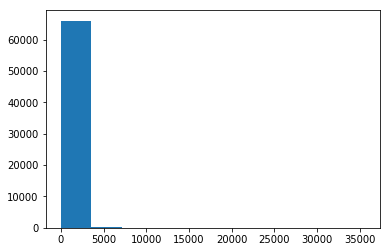

In [62]:
unique, counts = np.unique(corpus, return_counts=True)


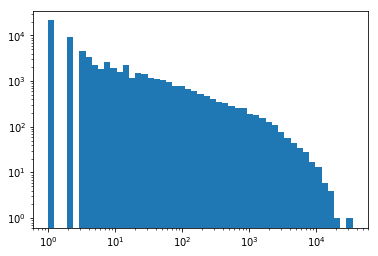

In [66]:
plt.hist(counts, bins=np.logspace(np.log10(1),np.log10(35000)), log=True)
plt.xscale('log')
plt.show()

In [43]:
corpus = np.unique(corpus)

In [68]:
from sklearn.linear_model import LogisticRegression

LogisticRegression

In [44]:
len(corpus)

66286

In [45]:
from sklearn.preprocessing import Binarizer
from sklearn.feature_extraction.text import CountVectorizer

freq   = CountVectorizer()
corpus = freq.fit_transform(corpus)

# Extract words

In [55]:
df[df.Topic == 'News'].tweet_text

33                    [john, carroll, university, get, gift]
34             [spring, cook, book, healthy, chocolate, bar]
37         [rocky, river, prepare, more, flooding, city, ...
39         [forecast, cooler, mid, week, cooler, isolated...
40              [brother, farook, decorate, veteran, killer]
42         [arrest, connection, art, festival, theft, arr...
44         [director, craven, die, scream, filmmaker, die...
46                [black, box, miss, german, airline, crash]
51                              [avenger, explode, thursday]
53         [state, senate, expect, vote, common, core, bill]
89         [richard, kivett, elected, mayor, village, sun...
102           [yeman, fighter, take, aden, tawahi, district]
103           [yeman, fighter, take, aden, tawahi, district]
104        [agriculture, equestrian, center, take, shape,...
105        [agriculture, equestrian, center, take, shape,...
106        [arrest, polouse, drive, stolen, vehicle, dwi,...
107        [saint, patri